In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [281]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
from matplotlib import style

In [282]:
def PrimaCEBS(s,k,r,a,sigma,t):
  d1 = (np.log(s/k)+(r-a+0.5*np.power(sigma,2))*t)/(sigma*np.sqrt(t))
  d2 = d1 - sigma*np.sqrt(t)
  c = s*np.exp(-a*t)*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2)
  return c

def VegaBS(s,k,r,a,sigma,t):
  d1 = (np.log(s/k)+(r-a+0.5*np.power(sigma,2))*t)/(sigma*np.sqrt(t))
  v = s*np.sqrt(t)*np.exp(-a*t)*np.exp(-0.5*np.power(d1,2))/(np.sqrt(2*np.pi))
  return v

def VolatilidadImpCEBS(p,s,k,r,a,sigma0,t,tol):
  V = sigma0
  e = 1
  i = 1
  while e > tol and i < 100:
    call = PrimaCEBS(s,k,r,a,V,t)
    vega = VegaBS(s,k,r,a,V,t)
    V1 = V
    V = V - (call - p)/vega
    i = i + 1
    e = abs(V - V1)
    if e < tol:
      return V
    else:
      pass

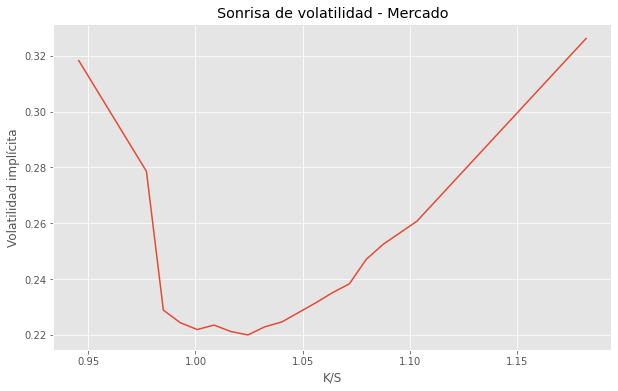

In [331]:
AAPL = yf.Ticker("AAPL")

calls = AAPL.option_chain("2021-06-25").calls
calls = calls[calls["volume"]>150]
calls = calls[["strike","impliedVolatility"]]

s = AAPL.history(start="2021-05-25", end="2021-05-26").loc["2021-05-25","Close"]

x = calls["strike"]/s
y1 = calls["impliedVolatility"]

plt.figure(figsize= (10,6))
style.use("ggplot")
plt.title("Sonrisa de volatilidad - Mercado")
plt.ylabel("Volatilidad implícita")
plt.xlabel("K/S")
plt.plot(x,y1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


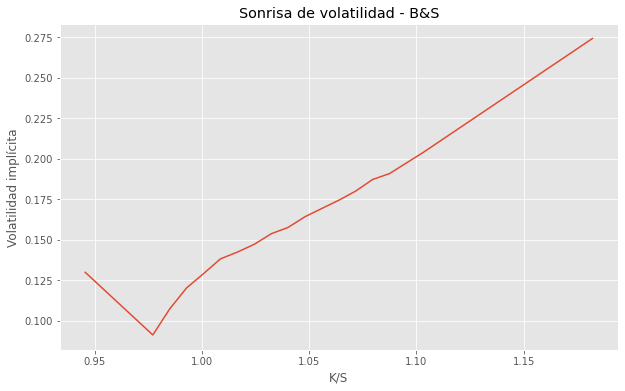

In [332]:
prima_strike = AAPL.option_chain("2021-06-25").calls
prima_strike = prima_strike[prima_strike["volume"]>150]
prima_strike = prima_strike[["lastPrice","strike"]]

p = [] 
k = []  

for i in prima_strike["lastPrice"]:
  p.append(i)
for i in prima_strike["strike"]:
  k.append(i)

y2 = []

for i,j in zip(p,k):
  y2.append(VolatilidadImpCEBS(i,s,j,0.01,0,0.2,1/12,0.000001))

y2[0] = VolatilidadImpCEBS(6.3,126,120,0.01,0,0.2,1/12,0.000001)

plt.figure(figsize= (10,6))
style.use("ggplot")
plt.title("Sonrisa de volatilidad - B&S")
plt.ylabel("Volatilidad implícita")
plt.xlabel("K/S")
plt.plot(x,y2)


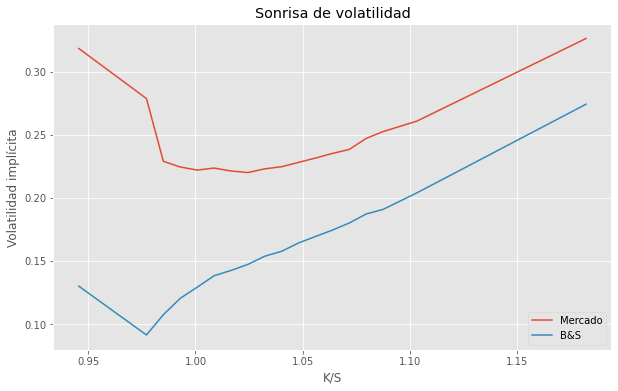

In [334]:
plt.figure(figsize= (10,6))
style.use("ggplot")
plt.title("Sonrisa de volatilidad")
plt.ylabel("Volatilidad implícita")
plt.xlabel("K/S")
plt.plot(x,y1, label = "Mercado")
plt.plot(x,y2, label = "B&S" )
plt.legend()